In [8]:
import numpy as np
import pandas as pd
import sklearn as sk
import random
import math as mat
import imagehash
import matplotlib.pyplot as plt

In [9]:
path = r'C:\Users\SUB\Desktop\Диплом\memsgenerator\memegenerator1.csv'
df = pd.read_csv(path, sep=',', encoding ='utf-16')

In [10]:
#считаем хэш
imgH = []
for i in df['Meme ID']:
    path_to_image = r'D:\memes\{}.jpg'.format(i)
    j = imagehash.phash(Image.open(path_to_image))
    imgH.append(np.concatenate((j.hash[0:8]),axis=0))
#df['Hash']=imgH

In [11]:
from sklearn.neighbors import BallTree
from sklearn.neighbors import DistanceMetric
metrics=DistanceMetric.get_metric('hamming')
tree = BallTree(imgH, metric=metrics)

In [41]:
def SimillarI(N,xstart,xfinish,xstep):# номер картинки,от, до, шаг, 
    meanR=[]
    indR=[]
    for j in np.arange(xstart, xfinish, xstep):
        radius = j #радиус балтри
        similar = tree.query_radius(imgH[N:N+1], r=radius, count_only=True)#кол-во похожих элементов
        ind = tree.query_radius(imgH[N:N+1], r=radius)  #индексы похожих эл-ов
        sumA=0
        for i in ind[0]:
            if(df['Base Meme Name'][i]!=df['Base Meme Name'][ind[0][0]]): #мемы, название которых не совпадает
                sumA+=1
        meanR.append(sumA/similar[0])
        indR.append(j)
    
    plt.plot(indR,meanR)
    plt.xlabel('Кол-во ошибок')
    plt.ylabel('Радиус')

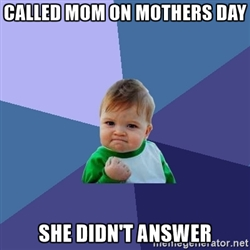

In [25]:
#исходный мем
from IPython.display import Image
path_to_image = "D:\memes\{}.jpg".format(df['Meme ID'][25931])
Image(filename = path_to_image, width=100, height=100)

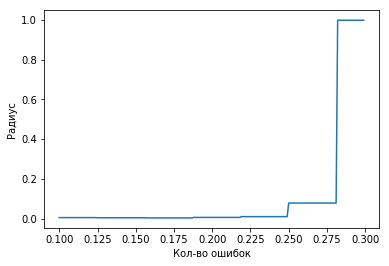

In [42]:
SimillarI(25931,0.1, 0.3, 0.001)

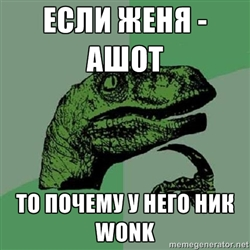

In [33]:
path_to_image = "D:\memes\{}.jpg".format(df['Meme ID'][7])
Image(filename = path_to_image, width=100, height=100)

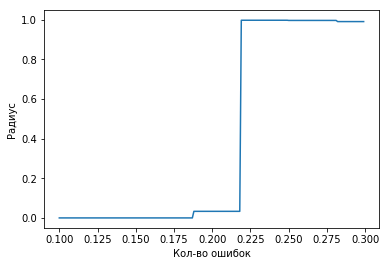

In [43]:
SimillarI(7,0.1, 0.3, 0.001)
